**Author**: Moch Nabil Farras Dhiya (10120034)

**E-mail**: nabilfarras923@gmail.com

-------------------

**Disclaimer**: The **dataset** used in this analysis is a public dataset retrieved from [Customer Personality Analysis - Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount).

# Background

## Attributes

**People**

*   ID: Customer's unique identifier
*   Year_Birth: Customer's birth year
*   Education: Customer's education level
*   Marital_Status: Customer's marital status
*   Income: Customer's yearly household income
*   Kidhome: Number of children in customer's household
*   Teenhome: Number of teenagers in customer's household
*   Dt_Customer: Date of customer's enrollment with the company
*   Recency: Number of days since customer's last purchase
*   Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

*   MntWines: Amount spent on wine in last 2 years
*   MntFruits: Amount spent on fruits in last 2 years
*   MntMeatProducts: Amount spent on meat in last 2 years
*   MntFishProducts: Amount spent on fish in last 2 years
*   MntSweetProducts: Amount spent on sweets in last 2 years
*   MntGoldProds: Amount spent on gold in last 2 years

**Promotion**


*   NumDealsPurchases: Number of purchases made with a discount
*   AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
*   AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
*   AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
*   AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
*   AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
*   Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

*   NumWebPurchases: Number of purchases made through the company’s website
*   NumCatalogPurchases: Number of purchases made using a catalogue
*   NumWebVisitsMonth: Number of visits to company’s website in the last month
*   NumStorePurchases: Number of purchases made directly in stores

## Goals

Perform clustering to summarize customer segments.

# Connect to Google Drive

In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
# %cd /content/gdrive/My Drive/Portfolio/Data Science/Python/Customer Segmentation/CSV

# Import Packages

In [3]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.cluster import AgglomerativeClustering 

from statistics import mean
from scipy.stats import skew

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances

# Import Data

In [4]:
data = pd.read_csv("../Data/marketing_campaign.csv", sep = '\t')

# Initial EDA

In [5]:
# Get the dataframe's info 
# (number of rows, column name & type, number of missing rows per column, memory usage)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Notice that income columns have null values.

In [6]:
# Display 10 random rows

data.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
317,9478,1985,Graduation,Single,66503.0,1,0,14-08-2012,30,91,...,3,0,0,0,0,0,0,3,11,0
1934,6200,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,340,...,3,0,0,0,0,0,0,3,11,0
32,5710,1970,Graduation,Together,40548.0,0,1,10-10-2012,31,110,...,5,0,1,0,0,0,0,3,11,0
2100,1055,1976,Master,Married,53204.0,1,1,20-03-2014,40,29,...,4,0,0,0,0,0,0,3,11,0
2210,607,1955,2n Cycle,Divorced,41769.0,0,1,13-02-2013,31,302,...,8,0,0,0,0,0,0,3,11,0
191,5602,1989,PhD,Together,66973.0,0,0,17-05-2013,98,466,...,3,0,0,0,0,0,0,3,11,0
1784,7261,1971,Graduation,Together,34600.0,1,1,01-01-2013,8,199,...,8,0,0,0,0,0,0,3,11,1
1648,6409,1967,Graduation,Divorced,57136.0,0,0,18-05-2013,18,267,...,6,0,0,0,0,0,0,3,11,1
503,5140,1985,PhD,Married,64355.0,1,0,24-08-2012,66,1047,...,8,0,0,0,0,0,0,3,11,0


In [7]:
for col in data.columns:
    print(f"\n======================= {col} =======================")
    display(data[col].value_counts())


======================= ID =======================


5524    1
6885    1
3478    1
7494    1
1763    1
       ..
5682    1
5564    1
6516    1
6255    1
9405    1
Name: ID, Length: 2240, dtype: int64


======================= Year_Birth =======================


1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64


======================= Education =======================


Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


======================= Marital_Status =======================


Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


======================= Income =======================


7500.0     12
35860.0     4
37760.0     3
83844.0     3
63841.0     3
           ..
40760.0     1
41452.0     1
6835.0      1
33622.0     1
52869.0     1
Name: Income, Length: 1974, dtype: int64


======================= Kidhome =======================


0    1293
1     899
2      48
Name: Kidhome, dtype: int64


======================= Teenhome =======================


0    1158
1    1030
2      52
Name: Teenhome, dtype: int64


======================= Dt_Customer =======================


31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: Dt_Customer, Length: 663, dtype: int64


======================= Recency =======================


56    37
30    32
54    32
46    31
92    30
      ..
41    15
59    14
22    13
7     12
44    11
Name: Recency, Length: 100, dtype: int64


======================= MntWines =======================


2       42
5       40
1       37
6       37
4       33
        ..
806      1
61       1
986      1
1230     1
428      1
Name: MntWines, Length: 776, dtype: int64


======================= MntFruits =======================


0      400
1      162
2      120
3      116
4      104
      ... 
164      1
130      1
189      1
101      1
154      1
Name: MntFruits, Length: 158, dtype: int64


======================= MntMeatProducts =======================


7      53
5      50
11     49
8      46
6      43
       ..
116     1
569     1
685     1
354     1
182     1
Name: MntMeatProducts, Length: 558, dtype: int64


======================= MntFishProducts =======================


0      384
2      156
3      130
4      108
6       82
      ... 
232      1
167      1
247      1
194      1
229      1
Name: MntFishProducts, Length: 182, dtype: int64


======================= MntSweetProducts =======================


0      419
1      161
2      128
3      101
4       82
      ... 
146      1
132      1
167      1
99       1
111      1
Name: MntSweetProducts, Length: 177, dtype: int64


======================= MntGoldProds =======================


1      73
4      70
3      69
5      63
12     63
       ..
178     1
169     1
132     1
262     1
247     1
Name: MntGoldProds, Length: 213, dtype: int64


======================= NumDealsPurchases =======================


1     970
2     497
3     297
4     189
5      94
6      61
0      46
7      40
8      14
9       8
15      7
10      5
11      5
12      4
13      3
Name: NumDealsPurchases, dtype: int64


======================= NumWebPurchases =======================


2     373
1     354
3     336
4     280
5     220
6     205
7     155
8     102
9      75
0      49
11     44
10     43
27      2
23      1
25      1
Name: NumWebPurchases, dtype: int64


======================= NumCatalogPurchases =======================


0     586
1     497
2     276
3     184
4     182
5     140
6     128
7      79
8      55
10     48
9      42
11     19
28      3
22      1
Name: NumCatalogPurchases, dtype: int64


======================= NumStorePurchases =======================


3     490
4     323
2     223
5     212
6     178
8     149
7     143
10    125
9     106
12    105
13     83
11     81
0      15
1       7
Name: NumStorePurchases, dtype: int64


======================= NumWebVisitsMonth =======================


7     393
8     342
6     340
5     281
4     218
3     205
2     202
1     153
9      83
0      11
20      3
10      3
14      2
19      2
17      1
13      1
Name: NumWebVisitsMonth, dtype: int64


======================= AcceptedCmp3 =======================


0    2077
1     163
Name: AcceptedCmp3, dtype: int64


======================= AcceptedCmp4 =======================


0    2073
1     167
Name: AcceptedCmp4, dtype: int64


======================= AcceptedCmp5 =======================


0    2077
1     163
Name: AcceptedCmp5, dtype: int64


======================= AcceptedCmp1 =======================


0    2096
1     144
Name: AcceptedCmp1, dtype: int64


======================= AcceptedCmp2 =======================


0    2210
1      30
Name: AcceptedCmp2, dtype: int64


======================= Complain =======================


0    2219
1      21
Name: Complain, dtype: int64


======================= Z_CostContact =======================


3    2240
Name: Z_CostContact, dtype: int64


======================= Z_Revenue =======================


11    2240
Name: Z_Revenue, dtype: int64


======================= Response =======================


0    1906
1     334
Name: Response, dtype: int64

Notice that some variables (columns) have multiple answers with the same meaning (e.g. Marital Status and Kidhome-Teenhome), which can be simplified to ease our analysis process. But, we need to check first if that is actually valid to do.

<AxesSubplot:>

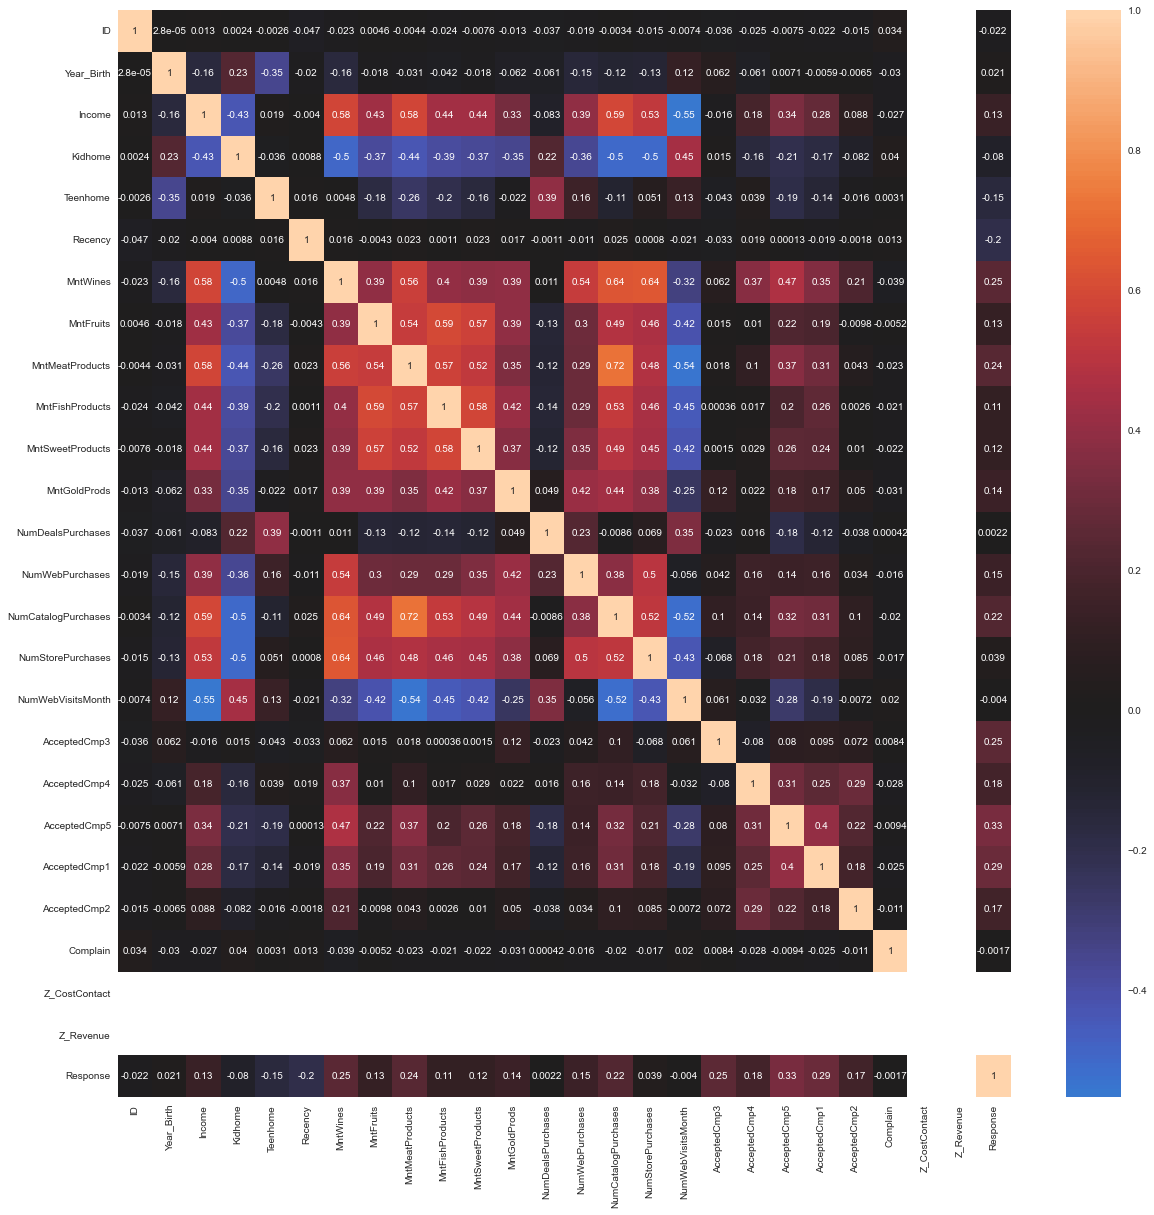

In [8]:
corrmat = data.corr()
plt.figure(figsize = (20,20))  
sns.heatmap(corrmat,annot = True, center = 0)

Based on the matrix corr above, we definitely can not combine the Kidhome and Teenhome columns into a single column.

# Missing Values and Outliers Handling

In [9]:
data[data.isna().any(axis = 1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [10]:
# We will search the percentage of missing values to decide what step is suitable to handle the situation

for col in data.columns:
    percentage = 100*data[col].isna().sum()/len(data)
    print(f"Missing value percentage in {col}: {percentage}%")

Missing value percentage in ID: 0.0%
Missing value percentage in Year_Birth: 0.0%
Missing value percentage in Education: 0.0%
Missing value percentage in Marital_Status: 0.0%
Missing value percentage in Income: 1.0714285714285714%
Missing value percentage in Kidhome: 0.0%
Missing value percentage in Teenhome: 0.0%
Missing value percentage in Dt_Customer: 0.0%
Missing value percentage in Recency: 0.0%
Missing value percentage in MntWines: 0.0%
Missing value percentage in MntFruits: 0.0%
Missing value percentage in MntMeatProducts: 0.0%
Missing value percentage in MntFishProducts: 0.0%
Missing value percentage in MntSweetProducts: 0.0%
Missing value percentage in MntGoldProds: 0.0%
Missing value percentage in NumDealsPurchases: 0.0%
Missing value percentage in NumWebPurchases: 0.0%
Missing value percentage in NumCatalogPurchases: 0.0%
Missing value percentage in NumStorePurchases: 0.0%
Missing value percentage in NumWebVisitsMonth: 0.0%
Missing value percentage in AcceptedCmp3: 0.0%
Miss

Since the missing percentage are less than 25%, we can do imputation on the data in the next step of the data preparation. We will analyze the data further to determine the suitable imputation for this column, whether it is 'mean' or 'median' imputation.

<AxesSubplot:ylabel='Income'>

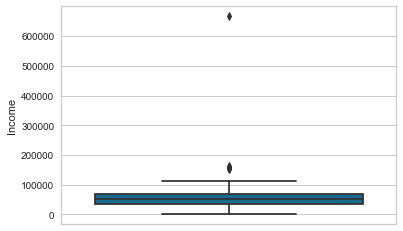

In [11]:
sns.boxplot(y = data["Income"])

There is an outlier in the data. So, we need to remove that particular outlier (>600K income).

In [12]:
data = data[data['Income'] < 600000]

Also notice from previous segment, we found customers that was born in the 1800s. We will also check the boxplot for that column.

<AxesSubplot:ylabel='Year_Birth'>

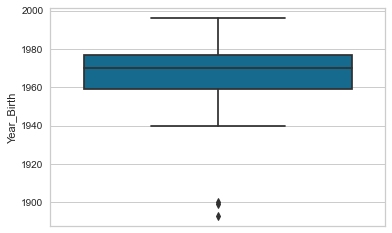

In [13]:
sns.boxplot(y = data["Year_Birth"])

There is indeed outliers in the data. So, we need to remove that particular outliers (was born in the 1800s to early 1900s).

In [14]:
data = data[data['Year_Birth'] > 1920]

Skewness: 0.347791933529504


<AxesSubplot:xlabel='Income', ylabel='Count'>

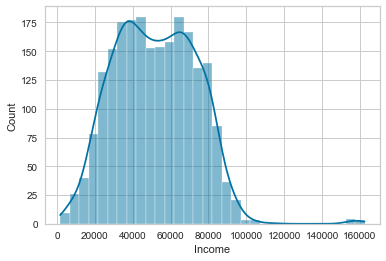

In [15]:
rating = data.loc[data["Income"].isna() == False]
print("Skewness:", skew(rating["Income"]))

sns.histplot(x = "Income", data = rating, kde = True)

Notice that since the skewness is in the interval [-0.5, 0.5] and based on the graph above, we can then use mean imputation on the missing values data.

In [16]:
# Mean imputation on Income column

data["Income"].fillna(data["Income"].mean())

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2212, dtype: float64

# Duplicate Rows Handling

In [17]:
print(len(data.drop_duplicates())/len(data))

1.0


Notice that since the ratio is 1, then there is no duplicate in the data.

# Data Manipulation

As stated before, there are some values in which have the same meaning on several columns. Furthermore, there are also columns in which we can simplified by combining it into a single column.

## Age

In [18]:
data["Age"] = int(dt.datetime.today().strftime("%Y")) - data["Year_Birth"]

## Education

In [19]:
def education(text):
    if text == '2n Cycle':
        return "Master"

    else:
        return text

data['Education'] = data['Education'].apply(education)

## Marital Status

In [20]:
def marital_status(x):
    if x in ['Married', 'Together']:
        return 'Together'
    
    else:
        return 'Single'
    
data['Marital_Status'] = data['Marital_Status'].apply(marital_status)

# Feature Engineering

## Dt_Customer

Convert the datatype of Dt_Customer column into datetime and calculate the # of days since they become a customer.

In [21]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format = "%d-%m-%Y")

In [22]:
data["Duration_Customer"] = (pd.to_datetime(dt.datetime.today().strftime("%d-%m-%Y")) - data["Dt_Customer"]).dt.days

C:\Users\c640\AppData\Local\Temp\ipykernel_14544\4034395626.py:1: UserWarning: Parsing '31-03-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data["Duration_Customer"] = (pd.to_datetime(dt.datetime.today().strftime("%d-%m-%Y")) - data["Dt_Customer"]).dt.days


## Frequency

In [23]:
data['Frequency'] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumWebVisitsMonth']

# Cleaned Data

## Rename Columns

In [24]:
data = data.rename(columns = {'MntWines': "Wines", 
                              'MntFruits':'Fruits', 
                              'MntMeatProducts':'Meat', 
                              'MntFishProducts':'Fish',
                              'MntSweetProducts':'Sweets', 
                              'MntGoldProds':'Gold', 
                              'NumWebPurchases': "Web", 
                              'NumCatalogPurchases':'Catalog', 
                              'NumStorePurchases':'Store', 
                              'NumDealsPurchases': 'Discount', 
                              'NumWebVisitsMonth': 'Web_visit',
                              'AcceptedCmp1': 'Campaign 1',
                              'AcceptedCmp2': 'Campaign 2',
                              'AcceptedCmp3': 'Campaign 3', 
                              'AcceptedCmp4': 'Campaign 4', 
                              'AcceptedCmp5': 'Campaign 5'})

## Dropping Columns

In [25]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'Discount', 'Web', 'Catalog', 'Store', 'Web_visit',
       'Campaign 3', 'Campaign 4', 'Campaign 5', 'Campaign 1', 'Campaign 2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Duration_Customer', 'Frequency'],
      dtype='object')

In [26]:
data = data[["ID", "Age", "Education", "Marital_Status", "Income", 
             'Kidhome', 'Teenhome', "Duration_Customer", 'Frequency', 'Recency', 
             'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 
             'Discount', 'Web', 'Catalog', 'Store', 'Web_visit', 
             'Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 
             'Complain', 'Response']]

# Data Labeling

## Education

To make clustering easier, we can group the answers in Education column into categories. And since the values in this column are ordinal, it is more wise if we use Label Encoding on this column.

In [27]:
data['Education'] = data['Education'].map({'Basic': 0,
                                           'Graduation': 1,
                                           'Master': 2,
                                           'PhD': 3})

## Marital Status

Notice that we can simplified the values in this column into 2 values: Single and Relationship, then do Label Encoding on these values.

In [28]:
data['Marital_Status'] = data['Marital_Status'].map({'Single': 0,
                                                     'Together': 1})

## Income

To ease our clustering, we will categorized the customers income to 4 category. In 2021-2022. The World Bank assigns the world’s economies to four income groups—low, lower-middle, upper-middle, and high-income countries. After that, we will convert these values into number by Label Encoding.

In [29]:
pd.qcut(data['Income'], 4).unique()

[(51371.0, 68487.0], (35233.5, 51371.0], (68487.0, 162397.0], (1729.999, 35233.5]]
Categories (4, interval[float64, right]): [(1729.999, 35233.5] < (35233.5, 51371.0] < (51371.0, 68487.0] < (68487.0, 162397.0]]

In [30]:
data["Income_Class"] = pd.qcut(data['Income'], 4, labels = ['Low', 'Lower-middle', 'Upper-middle', 'High'])

data['Income_Class'] = data['Income_Class'].map({'Low': 0,
                                                 'Lower-middle': 1,
                                                 'Upper-middle': 2,
                                                 'High': 3})

## Age

In [31]:
scaler = StandardScaler()

age = data[['Age']]
age = pd.DataFrame(scaler.fit_transform(age)).rename(columns = {0: 'value'})
age

,value
0,1.018352
1,1.274785
2,0.334530
3,-1.289547
4,-1.033114
...,...
2207,0.163575
2208,1.958607
2209,-1.033114
2210,1.103830


Then, we will calculate the optimal # of cluster using Elbow Method with Silhouette criterion.

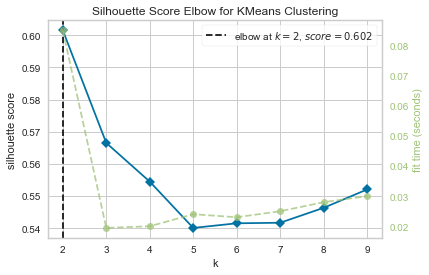

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [32]:
elbow_score_age = KElbowVisualizer(KMeans(), k = (2, 10), metric = 'silhouette')
elbow_score_age.fit(age)
elbow_score_age.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

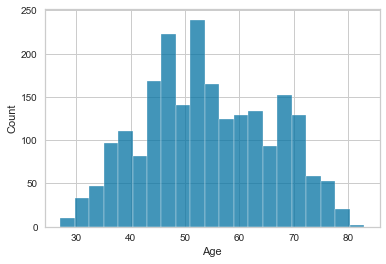

In [33]:
sns.histplot(x = 'Age', data = data)

Though the silhouette criterion suggests that the optimum # of cluster is 2, but we will prefer to use 4 cluster because of the following reasons.
1. We can distinguigh the customer behaviour better this way, since we notice that the range value is quite high.
2. The silhouette score for 4 cluster is still reaasonably high.

In [34]:
def cluster_age(x):
    if x <= 40:
        return 0

    elif x <= 50:
        return 1

    elif x <= 65:
        return 2

    else:
        return 3

data['Age_Class'] = data['Age'].apply(cluster_age)

# RFM Dataset

In [35]:
rfm = data.copy()

In [36]:
rfm = rfm[['ID', 'Recency', 'Frequency', 
           'Wines', 'Fruits', 'Meat', 
           'Fish', 'Sweets', 'Gold']]

# Final Data

In [37]:
data.to_csv("../Data/final_data.csv")
rfm.to_csv("../Data/RFM/rfm_data.csv")